In [ ]:
pip install neptune-client;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.6/442.6 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.8/136.8 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 664.5 kB/s eta 0:00:00


In [ ]:
pip install neptune-notebooks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.1 MB/s eta 0:00:00
  Created wheel for neptune-notebooks: filename=neptune_notebooks-0.9.3-py2.py3-none-any.whl size=1074609 sha256=2a45f80d806dbbd51aa13c82ecec37c19b397bc73342860cca1bb3b77903c534
  Stored in directory: /root/.cache/pip/wheels/16/32/72/b4fb207ede5ec809fa1e250b3c931d41bbfef41068f6189e68
Successfully built neptune-notebooks


In [ ]:
pip install foolbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.4 MB/s eta 0:00:00


In [ ]:
import neptune.new as neptune
import time
import foolbox as fb

/usr/local/lib/python3.9/dist-packages/neptune/internal/backends/hosted_client.py:50: NeptuneDeprecationWarning: The 'neptune-client' package has been deprecated and will be removed in the future. Install the 'neptune' package instead. For more, see https://docs.neptune.ai/setup/upgrading/
  from neptune.version import version as neptune_client_version
<ipython-input-4-afda99beaa95>:1: NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.
  import neptune.new as neptune


In [ ]:
pip install foolbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import random
import foolbox as fb
import torch.optim as optim


trainMode = True
constrain = True
randd = random.randint(0,1000)
#randd = 528
print(f"Current random number : {randd}")
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/My Drive/Cifar100Experiments/Lipschitz Constrained"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
from utils import *
from NormalizedConvolutions import *
from networkTraining import *
from multiClassHinge import *
from LipschitzConstant import *

Current random number : 830
Mounted at /content/gdrive
/content/gdrive/My Drive/Cifar100Experiments/Lipschitz Constrained
cuda:0


In [ ]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    #transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)), #cifar10
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) #cifar100
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)), #cifar10
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) #cifar100
])

batch_size = 128

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

a = 0.5
M = 1

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class Normalisation(torch.nn.Module):
    def __init__(self, means=(0.485, 0.456, 0.406), stds=(0.229, 0.224, 0.225)):
        super().__init__()
        assert len(means) == len(stds)
        self.means = means
        self.stds = stds
    
    def forward(self, x):
        return (x - torch.tensor(self.means, device=x.device).view(1, len(self.means), 1, 1)) / torch.tensor(self.stds, device=x.device).view(1, len(self.means), 1, 1)

transform_test_rob = transforms.Compose([
    transforms.ToTensor()
])
batch_size_T = 1024
testset_rob = torchvision.datasets.CIFAR100(root='./data', train=False,
                                      download=True, transform=transform_test_rob)
testloader_rob = torch.utils.data.DataLoader(testset_rob, batch_size=batch_size_T,
                                        shuffle=False, num_workers=2)
images, labels = next(iter(testloader_rob))
images, labels = images.to(device), labels.to(device)

Files already downloaded and verified




 Now we are working with margin = 0.07


Training with learning rate 0.001
https://app.neptune.ai/geometricintegrationntnu/Cifar100LipschitzSwitch/e/CIF-35
Initial regularization :  tensor(0.0021, device='cuda:0', grad_fn=<AddBackward0>) 


Loss [1, 100](epoch, minibatch):  4.155104587078094
Loss [1, 200](epoch, minibatch):  2.576101279258728
Loss [1, 300](epoch, minibatch):  2.2881996643543245
epoch 0, dts_0 :  tensor([0.1879, 0.4149, 0.1894, 0.4188], device='cuda:0')
epoch 0, dts_1 :  tensor([0.1808, 0.3964, 0.1726, 0.3758], device='cuda:0')
epoch 0, dts_2 :  tensor([0.2520, 0.6065, 0.2621, 0.6441], device='cuda:0')
Norms: [1.0002607107162476, 1.019866704940796, 1.0038249492645264, 1.0254230499267578, 1.0008115768432617, 1.0097222328186035, 1.0019371509552002, 1.0019588470458984, 0.9992529153823853, 1.035644292831421, 0.9998824000358582, 1.004315972328186]
Orthogonality violation: [0.00019935482123401016, 0.032558392733335495, 0.007356374058872461, 0.02907858043909073, 0.0035716572

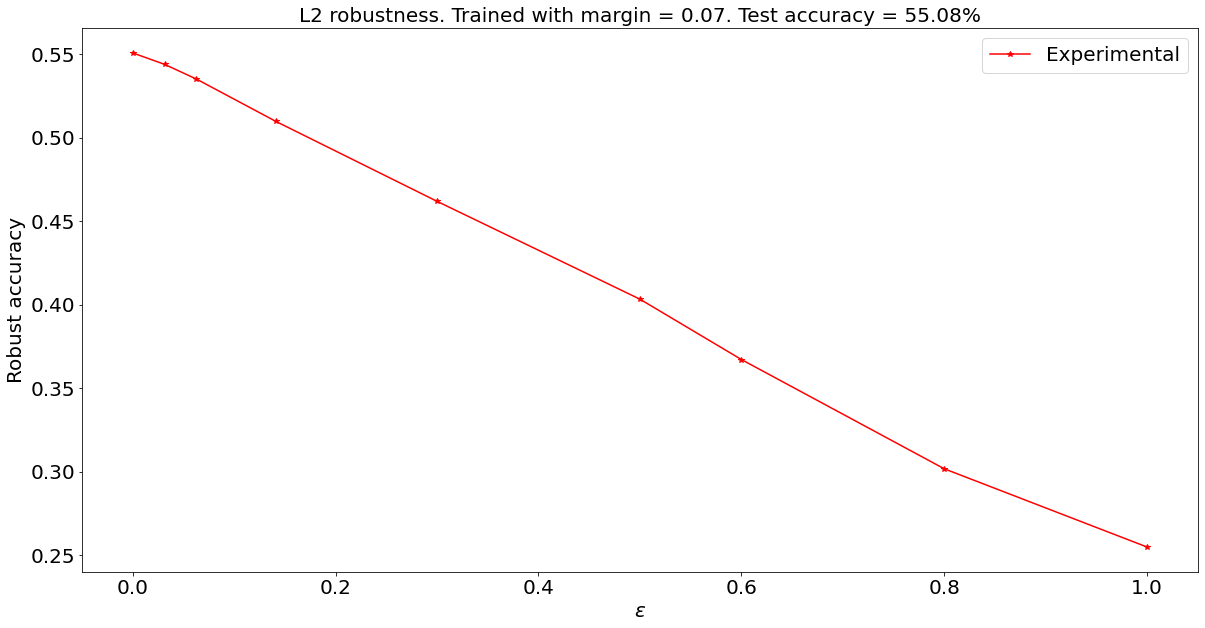

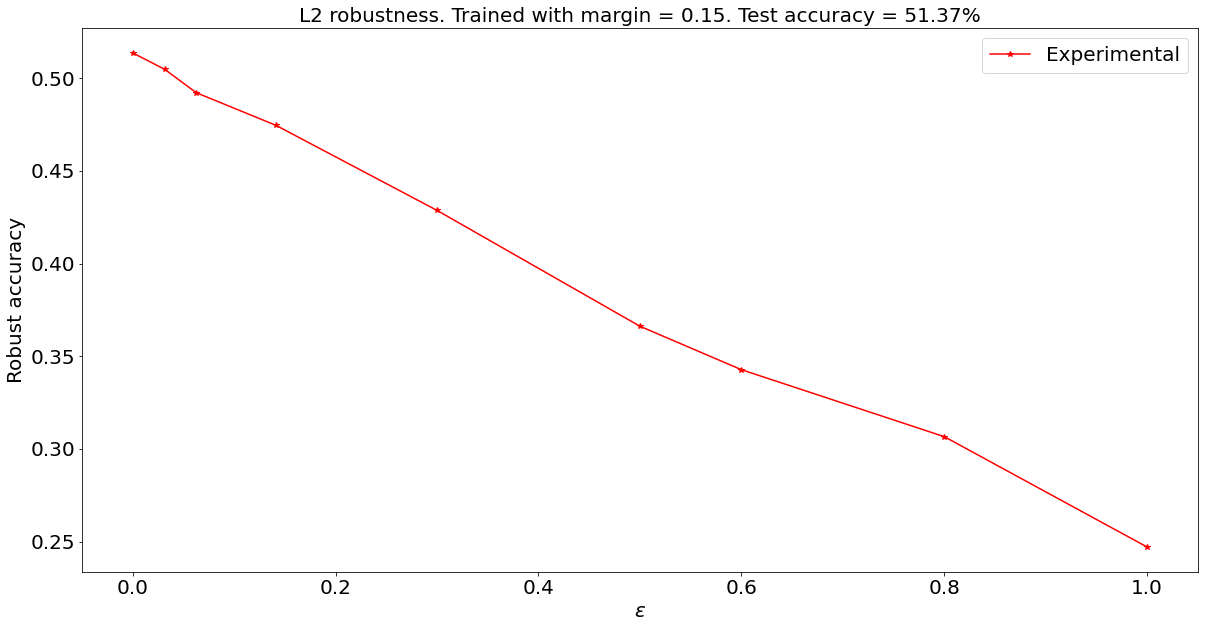

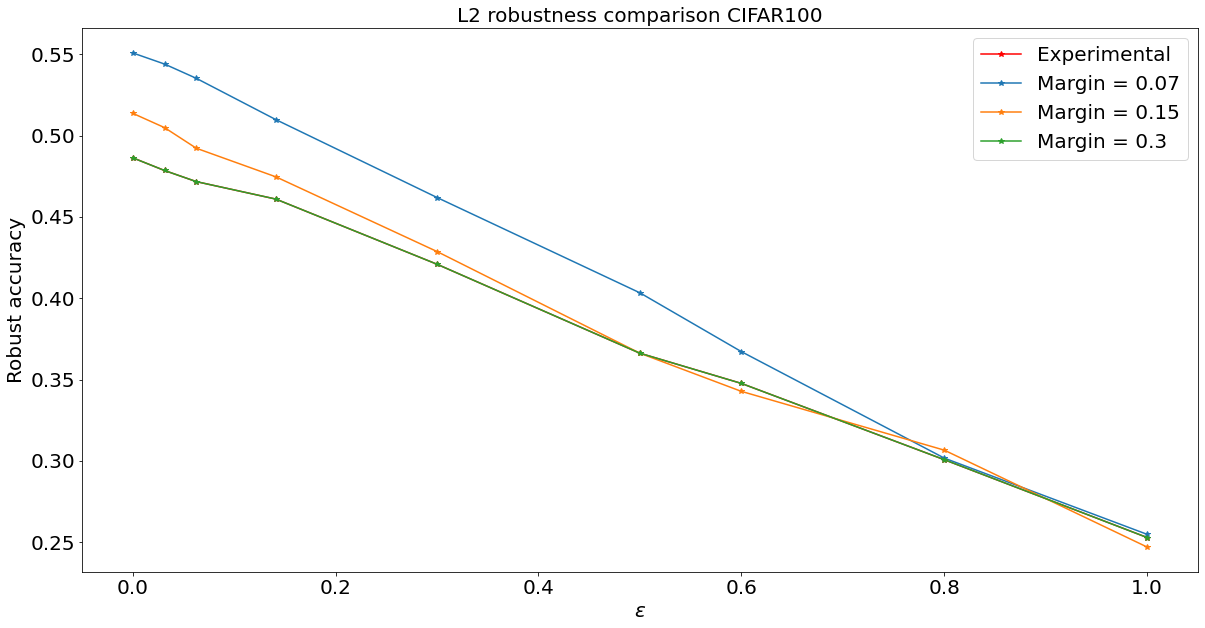

In [ ]:
#marginList = [0.05, 0.07, 0.1, 0.15,0.3, 0.5]
marginList = [0.07, 0.15,0.3]
#marginList = [0.15]
#marginList = [0.07]
epsilons = [0.0, 8/255, 16/255, 36/255, 0.3, 0.5, 0.6, 0.8, 1.0]
saveRobAcc = np.zeros((len(marginList),len(epsilons)))
it = 0
for num,margin in enumerate(marginList):

  print(f"\n\n Now we are working with margin = {margin}\n\n")

  net = Network(3,32,64,128,4,4,4,S = 2, a = a, M=M)
  net.to(device);
  net.load_state_dict(torch.load(f"CertifiedLip_margin_{margin}.pt"), strict=False)

  criterion = multiClassHingeLoss(margin = margin)
  #criterion = nn.CrossEntropyLoss()
  #criterion = torch.nn.MultiMarginLoss(p=1, margin=margin)
  lr = 1e-3
  epochs = 100
  optimzier = "Stochastic Gradient Descent"
  weight_decay = 0
  
  optimizer = optim.SGD(net.parameters(),lr=lr,momentum=0.9 ,weight_decay=weight_decay)
  #optimizer = optim.Adam(net.parameters(),lr=lr,weight_decay=weight_decay)
  scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

  model_save_name = f'Cifar100_CertifiedLip_margin_{margin}.pt'
  path = F"{model_save_name}" 

  if trainMode:
    loss = -1
    while loss<0:
      print(f"Training with learning rate {lr}")
      run = neptune.init_run(
      project="geometricintegrationntnu/Cifar100LipschitzSwitch",
      api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2YzM5YjI2My1kYTI2LTRhNmMtOWI5Ni1lYzlmYzBiZWZiNzIifQ==",
      source_files=["main.ipynb", "NormalizedConvolutions.py", "networkTraining.py"]
  )  # your credentials
      run["Exploded training"] = False

      config = {
        "learning_rate":lr, 
        "epochs":epochs, 
        "batch_size":batch_size, 
        "weight_decay":weight_decay,
        "optimizer":optimizer,
        "description":f"Training with margin {margin}"
        }
      run["parameters"] = config

      loss = train(net, margin, criterion, optimizer, scheduler, trainloader, testloader, device, epochs=epochs, reg=True, a=a, constrain = constrain, run=run, gamma=1.)
      

      if loss<0:
        net = Network(3,32,64,128,4,4,4,S=2,a=a,M=M)
        net.to(device);
        net.load_state_dict(torch.load(f"CertifiedLip_margin_{margin}.pt"), strict=False)
        lr/=10
        optimizer = optim.SGD(net.parameters(),lr=lr,momentum=0.9)#,weight_decay=1e-4)
        #optimizer = optim.Adam(net.parameters(),lr=lr)#,weight_decay=1e-4)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
        run["Exploded training"] = True
        run.stop()


    torch.save(net.state_dict(), path)
    
  else:
    net.load_state_dict(torch.load(path))
  
  model = nn.Sequential(Normalisation(),net).eval()
  fmodel = fb.PyTorchModel(model, bounds=(0, 1))

  acc = fb.utils.accuracy(fmodel, images, labels)

  attack = fb.attacks.L2PGD(steps=10)
  _, advs, success = attack(fmodel, images, labels, epsilons=epsilons)
  robust_accuracy = torch.mean((1-1.*success),axis=1)
  saveRobAcc[num] = robust_accuracy.detach().cpu().numpy()

  it += 1
  destination = f"Cifar100_updateMargin_{margin}.txt"
  np.savetxt(destination, saveRobAcc[num].reshape(-1,1))

  fig = plt.figure(figsize=(20,10))
  plt.plot(epsilons,robust_accuracy.detach().cpu().numpy(),'r-*',label="Experimental")
  plt.xlabel(r"$\varepsilon$",fontsize=20)
  plt.ylabel("Robust accuracy",fontsize=20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.legend(fontsize=20,loc=1)
  plt.title(f"L2 robustness. Trained with margin = {margin}. Test accuracy = {round(acc * 100,2)}%",fontsize=20);

  plt.savefig(f'Cifar100_L2margin_{margin}.png')

  print("Waiting 2 minutes to make sure to save the right files")
  time.sleep(120) # Delay for 1 minute (60 seconds).
  run[f"L2Margin{margin}"].upload(f'Cifar100_L2margin_{margin}.png')
  run[f"txtFile{margin}"].upload(f"Cifar100_updateMargin_{margin}.txt")
  run["trained_model"].upload(path)
  run["txtFileRobustness"].upload(destination)
  
  run.stop()


for i in range(len(marginList)):
  plt.plot(epsilons,saveRobAcc[i],'-*',label=f"Margin = {marginList[i]}")

plt.xlabel(r"$\varepsilon$",fontsize=20)
plt.ylabel("Robust accuracy",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc=1)
plt.title(f"L2 robustness comparison CIFAR100",fontsize=20);

plt.savefig(f'Cifar100_L2RobustnessComparison.png')